In [1]:
import sklearn.datasets as dataset
import sklearn.tree as tree
import os

os.chdir(r'C:\Users\tanzh\Documents\Git Folder\Machine-Learning-Metrics')
import ml_metrics

In [2]:
iris = dataset.load_iris()
X = iris.data
y = iris.target

In [3]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
tree_clf = tree.DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [5]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

[Text(167.4, 199.32, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(193.15384615384616, 163.07999999999998, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(103.01538461538462, 126.83999999999999, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(51.50769230769231, 90.6, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(154.52307692307693, 90.6, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Tex

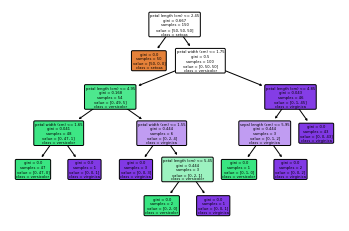

In [6]:
tree.plot_tree(tree_clf, filled=True, rounded=True, class_names=iris.target_names, feature_names=iris.feature_names)

# Exercises #7

In [7]:
import sklearn.tree as tree
import sklearn.model_selection as ms
import sklearn.metrics as metrics
import os
import pandas as pd
import numpy as np

os.chdir(r'C:\Users\tanzh\Documents\Git Folder\Machine-Learning-Metrics')
import ml_metrics

In [8]:
X, y = dataset.make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, train_size=0.80)

tree_clf = tree.DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

-----Performance Summary-----
Accuracy Rate: 100.0%
Precision Rate: 100.0%
Recall Rate: 100.0%
F1 Score: 100.0%

Misc. Info:
Number of data points in X: 8000



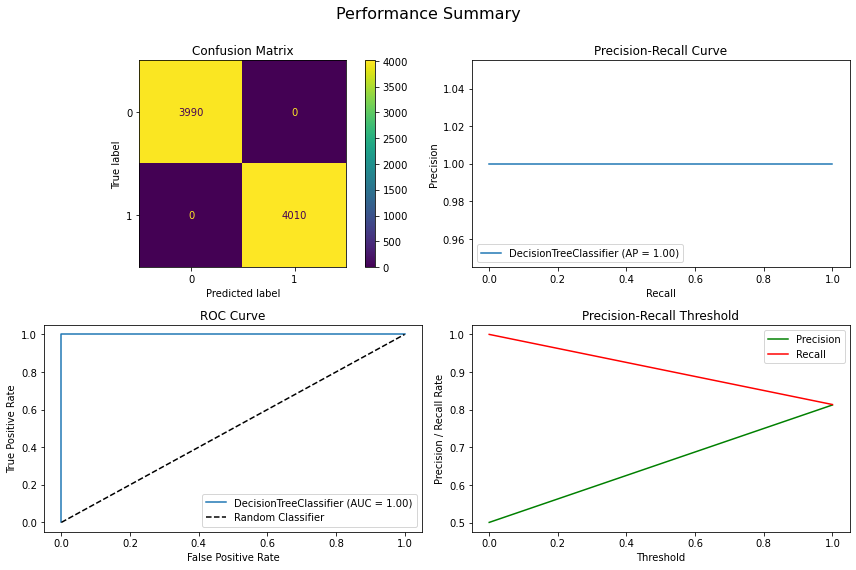

In [9]:
ml_metrics.classifier_performance_report(tree_clf, X_train, y_train)

-----Performance Summary-----
Accuracy Rate: 79.4%
Precision Rate: 78.7%
Recall Rate: 79.9%
F1 Score: 79.3%

Misc. Info:
Number of data points in X: 2000



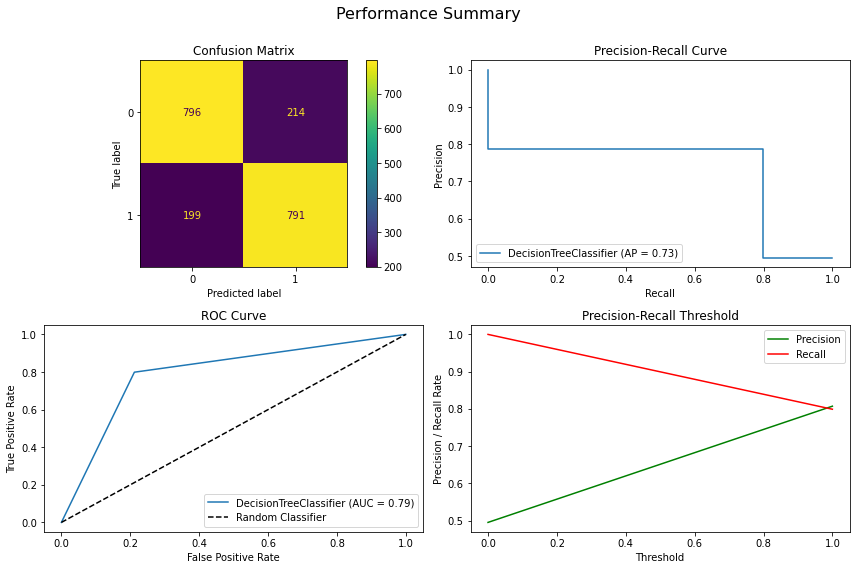

In [10]:
ml_metrics.classifier_performance_report(tree_clf, X_test, y_test)

In [11]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [12]:
parameter_grid = [
                {'max_depth': [5,10,15,20,25], 
                'min_samples_leaf': [25,50,75,100,200], 
                'max_leaf_nodes':[5,10,15,20,25,30], 
                'ccp_alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
                },
                {'ccp_alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
                },
                {'max_depth': [5,10,15,20,25], 
                'min_samples_leaf': [25,50,75,100,200], 
                'max_leaf_nodes':[5,10,15,20,25,30]
                } 
                ]

In [13]:
grid_search_cv = ms.GridSearchCV(tree_clf, parameter_grid, scoring='accuracy', cv=5, return_train_score=True)

In [14]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'ccp_alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                          'max_depth': [5, 10, 15, 20, 25],
                          'max_leaf_nodes': [5, 10, 15, 20, 25, 30],
                          'min_samples_leaf': [25, 50, 75, 100, 200]},
                         {'ccp_alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                        0.8]},
                         {'max_depth': [5, 10, 15, 20, 25],
                          'max_leaf_nodes': [5, 10, 15, 20, 25, 30],
                          'min_samples_leaf': [25, 50, 75, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [15]:
ml_metrics.grid_search_result_summary(grid_search_cv)

Grid Search Result Summary:
Best Estimator's params: {'max_depth': 10, 'max_leaf_nodes': 25, 'min_samples_leaf': 25}
Best Estimator's score %: 86.10000000000001
Best Estimator's index: 1258
Number of cross-validation: 5
Number of Parameters: 1358


Top 15 Parameters by Mean Test Score
                                                                Params  \
1318  {'max_depth': 20, 'max_leaf_nodes': 25, 'min_samples_leaf': 25}    
1348  {'max_depth': 25, 'max_leaf_nodes': 25, 'min_samples_leaf': 25}    
1288  {'max_depth': 15, 'max_leaf_nodes': 25, 'min_samples_leaf': 25}    
1258  {'max_depth': 10, 'max_leaf_nodes': 25, 'min_samples_leaf': 25}    
1354  {'max_depth': 25, 'max_leaf_nodes': 30, 'min_samples_leaf': 50}    
1294  {'max_depth': 15, 'max_leaf_nodes': 30, 'min_samples_leaf': 50}    
1264  {'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 50}    
1324  {'max_depth': 20, 'max_leaf_nodes': 30, 'min_samples_leaf': 50}    
1293  {'max_depth': 15, 'max_leaf_nodes': 30, 'm

-----Performance Summary-----
Accuracy Rate: 85.6%
Precision Rate: 84.5%
Recall Rate: 87.0%
F1 Score: 85.7%

Misc. Info:
Number of data points in X: 2000



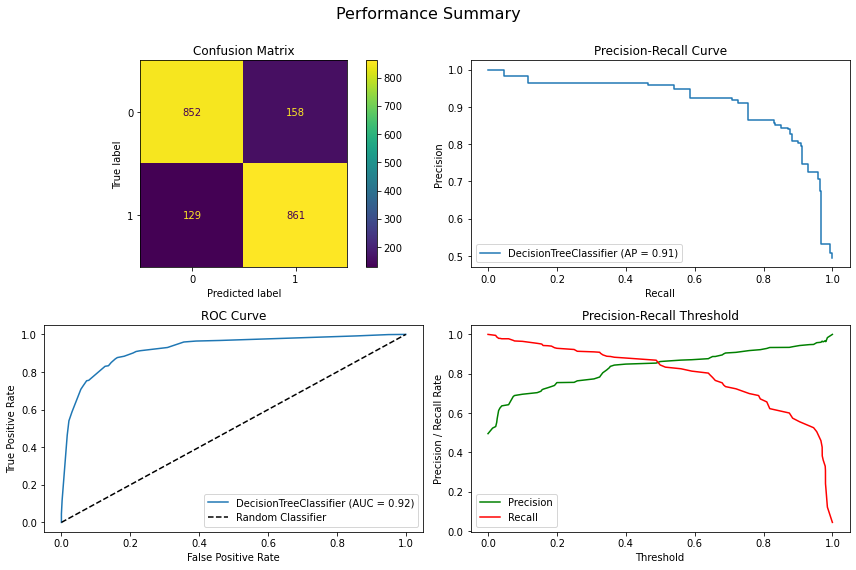

In [16]:
ml_metrics.classifier_performance_report(grid_search_cv.best_estimator_, X_test, y_test)

# Random Forest

In [17]:
import sklearn.ensemble as ensemble

In [18]:
rf_clf = ensemble.RandomForestClassifier(random_state=42, oob_score=True)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [19]:
rf_clf.oob_score_ * 100

84.8375

-----Performance Summary-----
Accuracy Rate: 100.0%
Precision Rate: 100.0%
Recall Rate: 100.0%
F1 Score: 100.0%

Misc. Info:
Number of data points in X: 8000



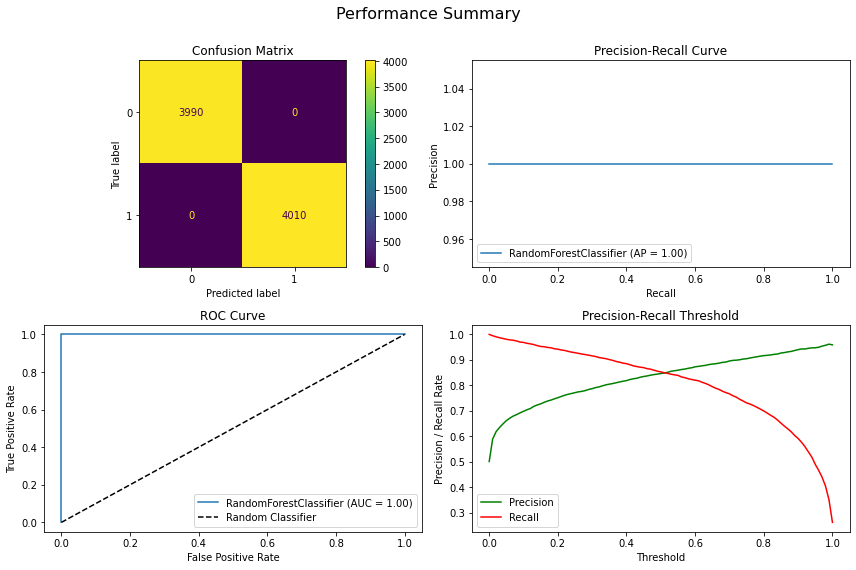

In [20]:
ml_metrics.classifier_performance_report(rf_clf, X_train, y_train)

-----Performance Summary-----
Accuracy Rate: 83.8%
Precision Rate: 83.6%
Recall Rate: 83.7%
F1 Score: 83.7%

Misc. Info:
Number of data points in X: 2000



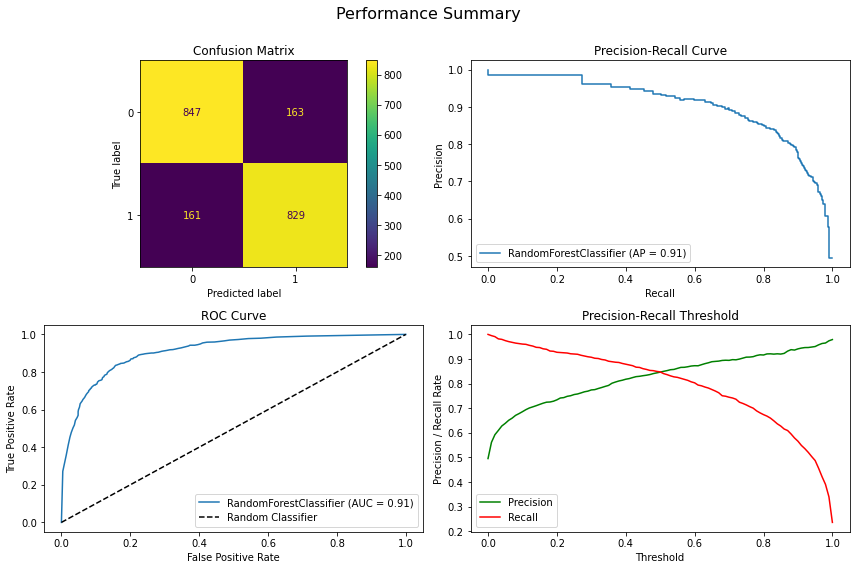

In [21]:
ml_metrics.classifier_performance_report(rf_clf, X_test, y_test)

In [22]:
help(rf_clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  

In [23]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [34]:
params_grid = [
                {'n_estimators': [25,50,75,100,125,150],
                'min_samples_leaf': [25,50,75,100,125,150],
                'max_depth': [10,20,30,40,50],
                'max_leaf_nodes': [10,20,30,40,50],
                'max_features' : [2,4,6,8,10]              
                },
                ]

In [35]:
grid_search_cv = ms.GridSearchCV(rf_clf, params_grid, scoring='accuracy', cv=3, return_train_score=True)

In [36]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             param_grid=[{'max_depth': [10, 20, 30, 40, 50],
                          'max_features': [2, 4, 6, 8, 10],
                          'max_leaf_nodes': [10, 20, 30, 40, 50],
                          'min_samples_leaf': [25, 50, 75, 100, 125, 150],
                          'n_estimators': [25, 50, 75, 100, 125, 150]}],
             return_train_score=True, scoring='accuracy')

In [37]:
ml_metrics.grid_search_result_summary(grid_search_cv)

Grid Search Result Summary:
Best Estimator's params: {'max_depth': 10, 'max_features': 2, 'max_leaf_nodes': 40, 'min_samples_leaf': 25, 'n_estimators': 25}
Best Estimator's score %: 86.36260583706105
Best Estimator's index: 108
Number of cross-validation: 3
Number of Parameters: 4500


Top 15 Parameters by Mean Test Score
                                                                                                       Params  \
111   {'max_depth': 10, 'max_features': 2, 'max_leaf_nodes': 40, 'min_samples_leaf': 25, 'n_estimators': 100}   
108   {'max_depth': 10, 'max_features': 2, 'max_leaf_nodes': 40, 'min_samples_leaf': 25, 'n_estimators': 25}    
1009  {'max_depth': 20, 'max_features': 2, 'max_leaf_nodes': 40, 'min_samples_leaf': 25, 'n_estimators': 50}    
3710  {'max_depth': 50, 'max_features': 2, 'max_leaf_nodes': 40, 'min_samples_leaf': 25, 'n_estimators': 75}    
2809  {'max_depth': 40, 'max_features': 2, 'max_leaf_nodes': 40, 'min_samples_leaf': 25, 'n_estimators': 50}   

-----Performance Summary-----
Accuracy Rate: 86.0%
Precision Rate: 85.4%
Recall Rate: 86.4%
F1 Score: 85.9%

Misc. Info:
Number of data points in X: 2000



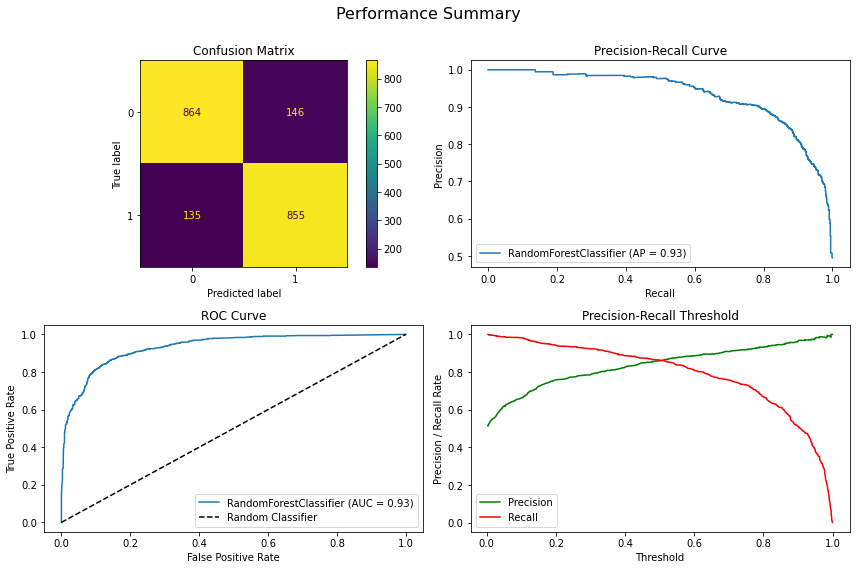

In [38]:
ml_metrics.classifier_performance_report(grid_search_cv.best_estimator_, X_test, y_test)